### Autocorrelation
The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF). This value of k is the time gap being considered and is called the lag. A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.

$
Corr(yt,yt−k),k=1,2,....
$

The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times.

If we assume an AR(k) model, then we may wish to only measure the association between yt and yt−k and filter out the linear influence of the random variables that lie in between (i.e., yt−1,yt−2,…,yt−(k−1)), which requires a transformation on the time series. Then by calculating the correlation of the transformed time series we obtain the **partial autocorrelation function (PACF)**.

In [50]:
import yfinance as yf
import pandas as pd

In [2]:
data = yf.Ticker('TSLA')
tsla = data.history(period="max")

In [3]:
tsla.drop(columns={'Open','High','Low','Volume','Dividends','Stock Splits'}, inplace=True)

In [20]:
tsla.sort_index(ascending=False, inplace=True)
tsla.head()

,Close
Date,
2022-04-29,870.760010
2022-04-28,877.510010
2022-04-27,881.510010
2022-04-26,876.419983
2022-04-25,998.020020


<AxesSubplot:xlabel='Date'>

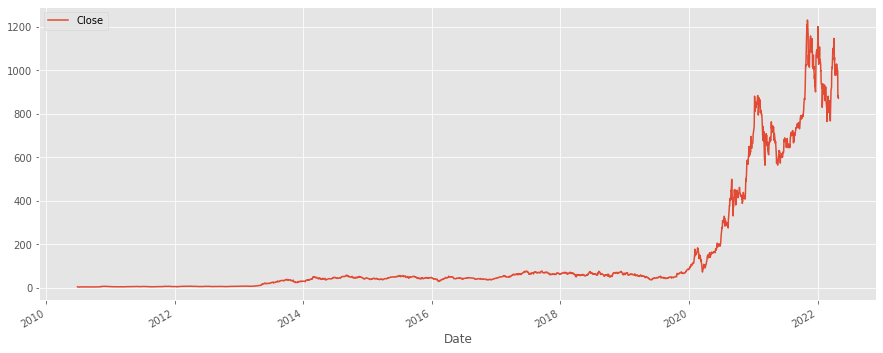

In [21]:
tsla.plot(figsize=(15,6), grid=True)

In [22]:
tsla.isnull().sum()

Close    0
dtype: int64

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6)

In [33]:
test_data = tsla['2021-04-29':'2022-04-29']

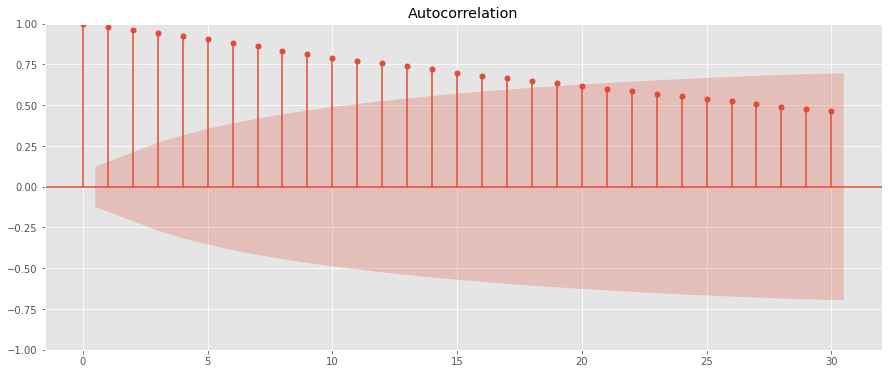

In [65]:
plot_acf(test_data, lags=30, use_vlines = True);

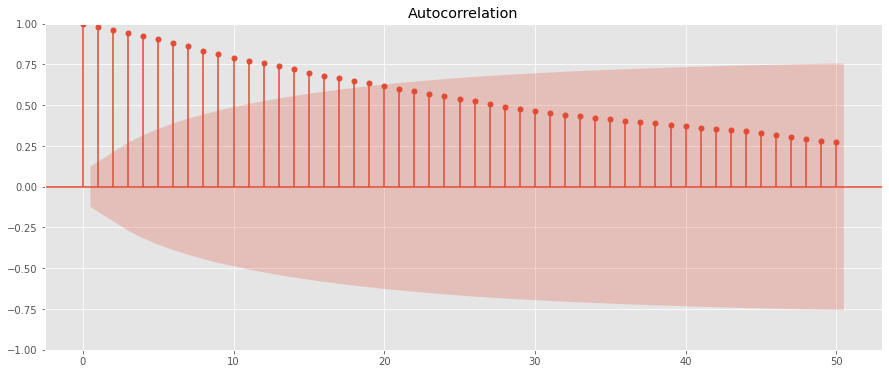

In [85]:
plot_acf(test_data, lags=50, use_vlines = True);

***PACF***

In general, the "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables.

A partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags.

The autocorrelation of a time series Y at lag 1 is the coefficient of correlation between Yt and Yt-1, which is presumably also the correlation between Yt-1 and Yt-2. But if Yt is correlated with Yt-1, and Yt-1 is equally correlated with Yt-2, then we should also expect to find correlation between Yt and Yt-2. In fact, the amount of correlation we should expect at lag 2 is precisely the square of the lag-1 correlation.

Thus, the correlation at lag 1 "propagates" to lag 2 and presumably to higher-order lags. The partial autocorrelation at lag 2 is therefore the difference between the actual correlation at lag 2 and the expected correlation due to the propagation of correlation at lag 1.

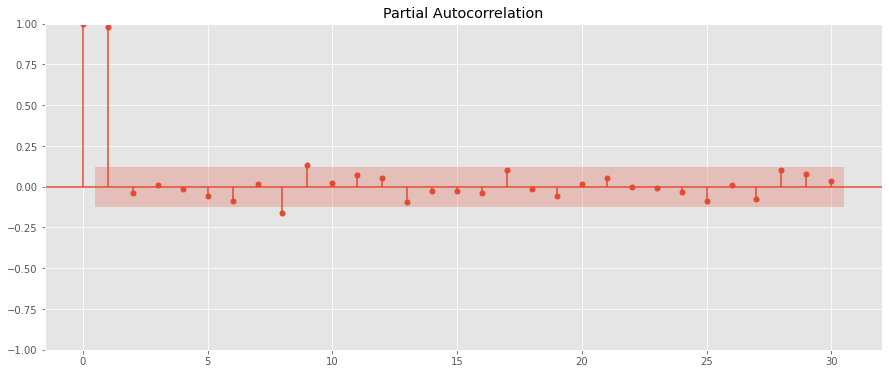

In [48]:
plot_pacf(test_data, lags=30, use_vlines = True, method='ywm');

***Reading ***

https://people.duke.edu/~rnau/411arim3.htm

https://online.stat.psu.edu/stat462/node/188/

https://www.alpharithms.com/autocorrelation-time-series-python-432909/

In [76]:
weather = pd.read_csv('lv_weather.csv', index_col='date')

In [77]:
weather.head()

,temp
date,
2020-01-01,2.8
2020-01-02,4.4
2020-01-03,3.2
2020-01-04,2.8
2020-01-05,1.3


In [80]:
weather.index = pd.to_datetime(weather.index)
weather_monthly_min = weather.resample('M').min()
weather_monthly_max = weather.resample('M').max()
weather_monthly_mean = weather.resample('M').mean()

<AxesSubplot:title={'center':'Min. weather monthly'}, xlabel='date'>

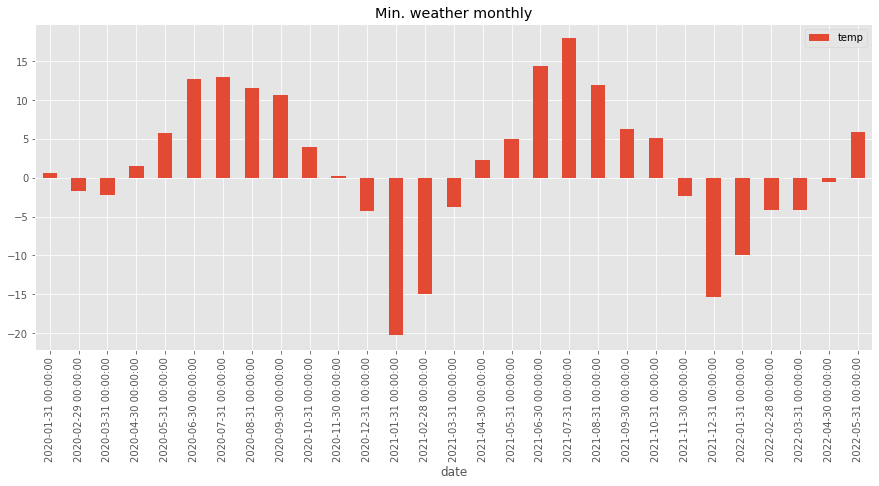

In [82]:
weather_monthly_min.plot(kind='bar', title = 'Min. weather monthly')

<AxesSubplot:title={'center':'Max. weather monthly'}, xlabel='date'>

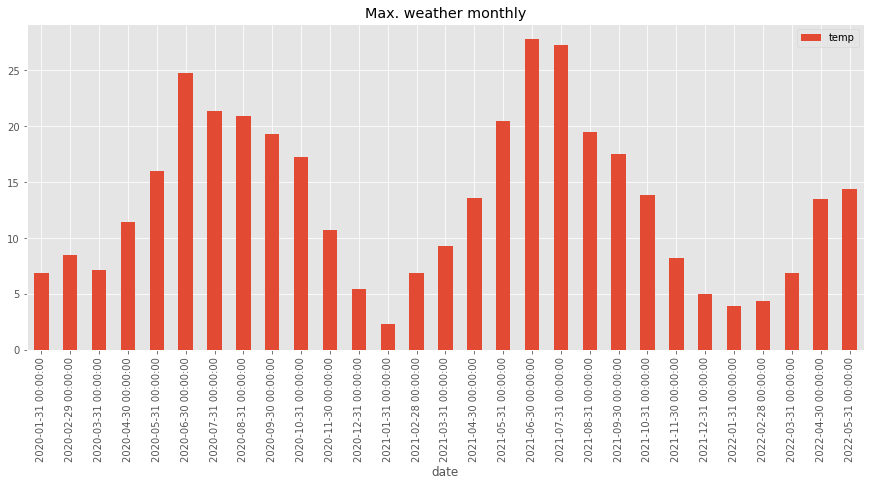

In [83]:
weather_monthly_max.plot(kind='bar', title = 'Max. weather monthly')

<AxesSubplot:title={'center':'Mean weather monthly'}, xlabel='date'>

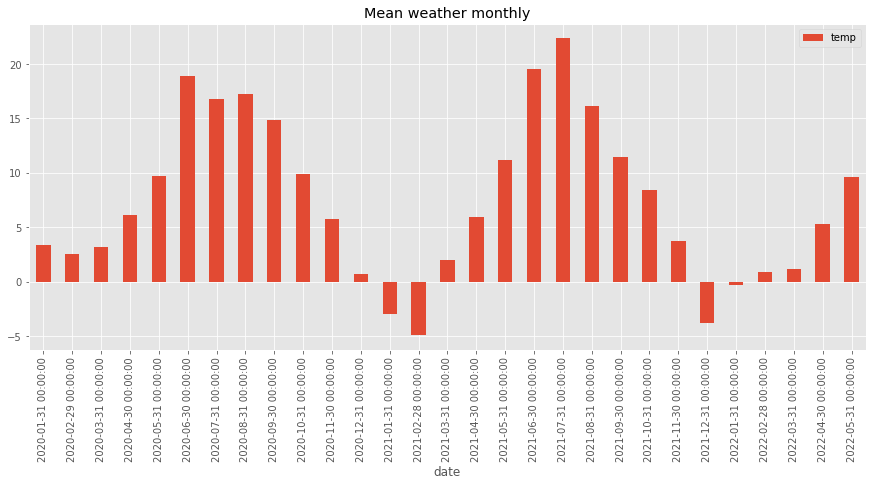

In [84]:
weather_monthly_mean.plot(kind='bar', title = 'Mean weather monthly')

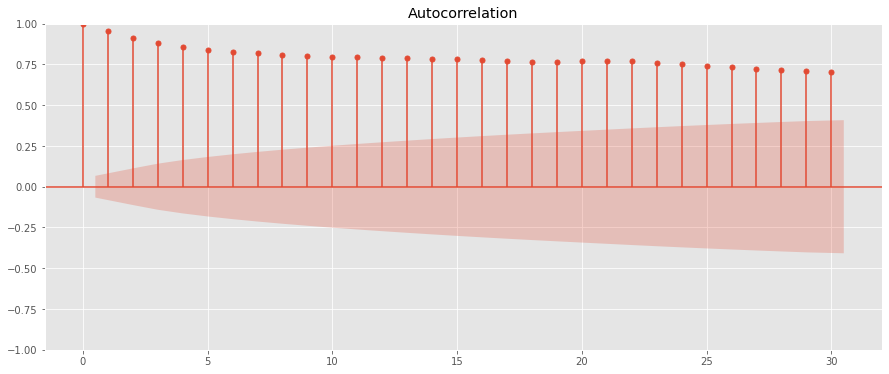

In [63]:
plot_acf(weather, lags=30, use_vlines = True);

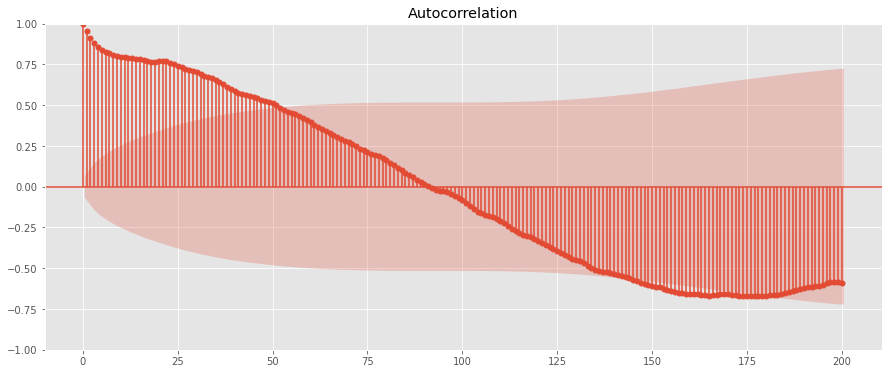

In [64]:
plot_acf(weather, lags=200, use_vlines = True);